# Setup: Install Required Packages (For First-Time Users)

In [ ]:
#!pip install pandas numpy matplotlib seaborn scikit-learn shap openpyxl


# Step-by-Step Code: Pseudostatic Slope Stability Classification

In [23]:
# -------------------------------
# IMPORT REQUIRED LIBRARIES
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


# Load & Preprocess Dataset

In [26]:
# Load dataset
file_path = "Collected Data_PS_GitHub upload.xlsx"
df = pd.read_excel(file_path, sheet_name=0)

# Preview columns
print("Original columns:", df.columns.tolist())
df = df.iloc[:, 1:7]  # assuming data starts from column B as earlier
df.columns = ['Slope_Angle', 'CbygammaH', 'phi', 'kh', 'kvr', 'FOS']

# Create binary classification target: FOS >= 1 => 1 (Safe), else 0 (Unsafe)
df['Label'] = (df['FOS'] >= 1.0).astype(int)

# Drop the original FOS (since we now work with binary class)
df = df.drop(columns=['FOS'])

df.head()


Original columns: ['itr', 'Slope Angle', 'CbygammaH', 'phi', 'kh', 'kvr', 'fmp', 'Xmp', 'Ymp', 'Rmp', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12']


,Slope_Angle,CbygammaH,phi,kh,kvr,Label
0,15,0.0,10,0.00,-0.5,0
1,15,0.0,10,0.05,-0.5,0
2,15,0.0,10,0.10,-0.5,0
3,15,0.0,10,0.15,-0.5,0
4,15,0.0,10,0.20,-0.5,0


# Explore Class Distribution

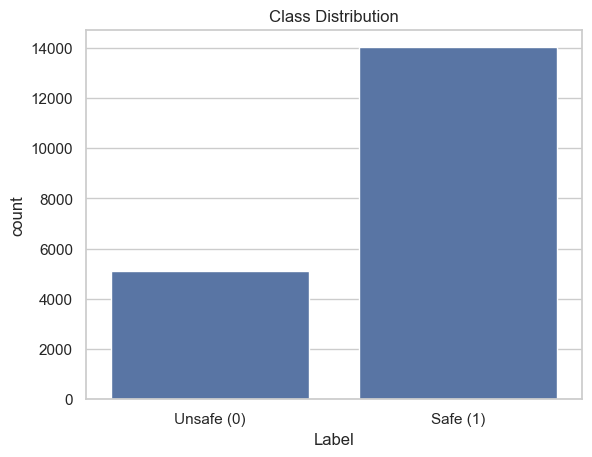

In [29]:
# Count of Safe vs Unsafe slopes
sns.countplot(data=df, x='Label')
plt.xticks([0, 1], ['Unsafe (0)', 'Safe (1)'])
plt.title("Class Distribution")
plt.show()


In [31]:
#Visualize data (optional - self)
# sns.pairplot(df, hue="Label", corner=True)
# plt.suptitle("Geotechnical Slope Stability Data", y=1.02)
# plt.show()

# Train-Test Split & Feature Scaling

In [34]:
X = df.drop('Label', axis=1)
y = df['Label']

# Standardize input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Model Training + Grid Search with Cross-Validation

In [37]:
# Set up the classifier and hyperparameter grid for decision tree
clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2}


# Model Evaluation

Classification Report:
              precision    recall  f1-score   support

      Unsafe       0.99      0.97      0.98      1052
        Safe       0.99      1.00      0.99      2774

    accuracy                           0.99      3826
   macro avg       0.99      0.98      0.99      3826
weighted avg       0.99      0.99      0.99      3826



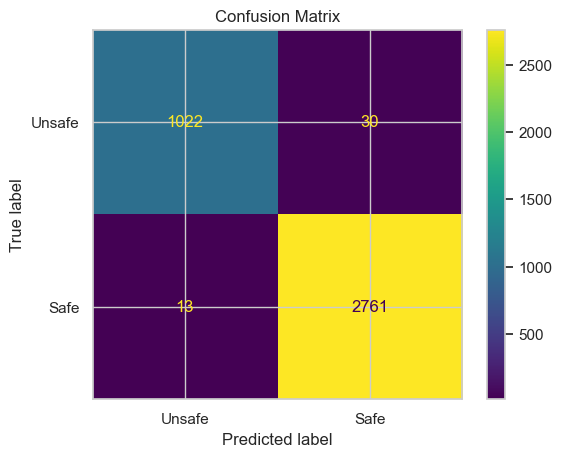

In [39]:
# Predictions
y_pred = best_model.predict(X_test)

# Classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Unsafe", "Safe"]))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, display_labels=["Unsafe", "Safe"])
plt.title("Confusion Matrix")
plt.show()


# Key Differences between regression and classification

In [44]:

print("🔍 Key Differences Between Regression and Classification Pipelines:\n")
print("{:<20} {:<30} {:<30}".format("Aspect", "Regression", "Classification"))
print("-" * 85)
print("{:<20} {:<30} {:<30}".format("Target Variable", "Continuous (e.g., FOS)", "Categorical (Safe/Unsafe)"))
print("{:<20} {:<30} {:<30}".format("Model Objective", "Minimize error", "Maximize accuracy/F1"))
print("{:<20} {:<30} {:<30}".format("Eval Metrics", "R², MAE, RMSE", "Accuracy, Recall, F1"))
print("{:<20} {:<30} {:<30}".format("Output", "Float value", "Class label (0/1)"))
print("{:<20} {:<30} {:<30}".format("Confusion Matrix", "Not used", "Essential"))

🔍 Key Differences Between Regression and Classification Pipelines:

Aspect               Regression                     Classification                
-------------------------------------------------------------------------------------
Target Variable      Continuous (e.g., FOS)         Categorical (Safe/Unsafe)     
Model Objective      Minimize error                 Maximize accuracy/F1          
Eval Metrics         R², MAE, RMSE                  Accuracy, Recall, F1          
Output               Float value                    Class label (0/1)             
Confusion Matrix     Not used                       Essential                     


# Hope this notebook has been helpful!
 
Created by: Abdul Waris, PMRF, IIT Hyderabad

For PG students and PhD Scholars at NIT Srinagar (Five Day Workshop on Introduction to FEM and ML in Geotechnical Engineering)